<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/Homework_3/Intro_to_ML_HW3_Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

              preci

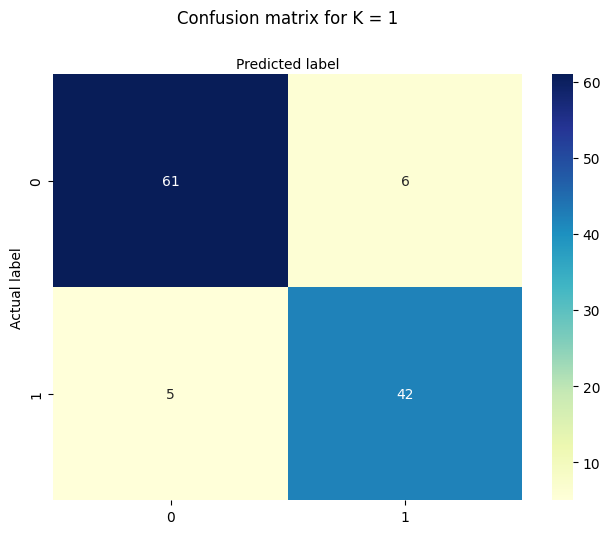

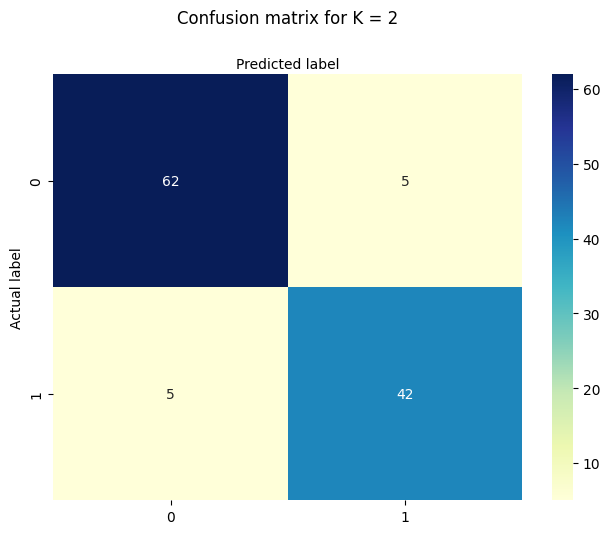

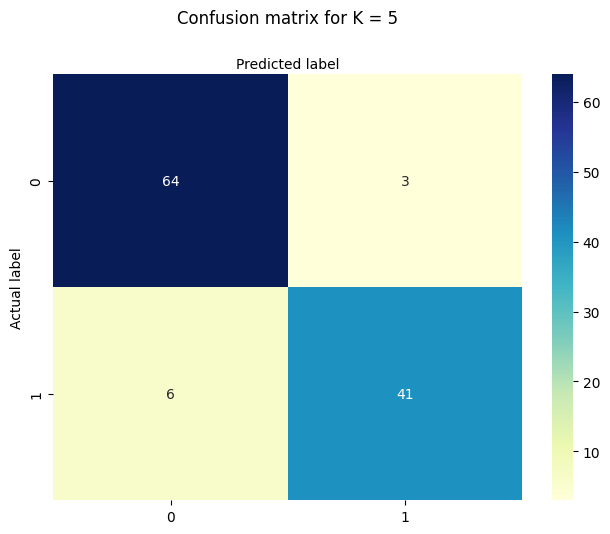

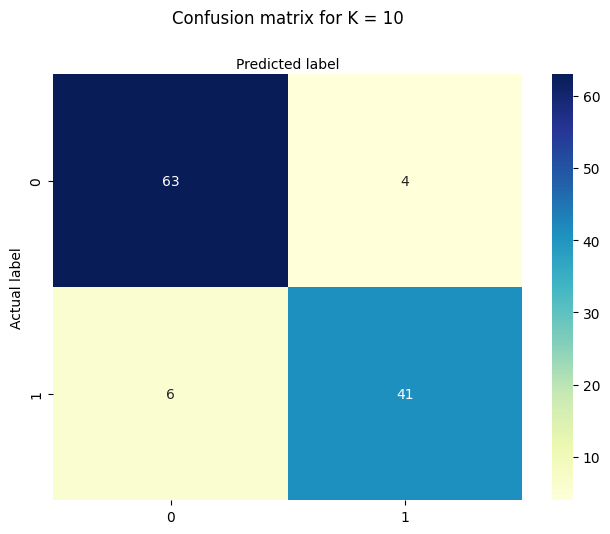

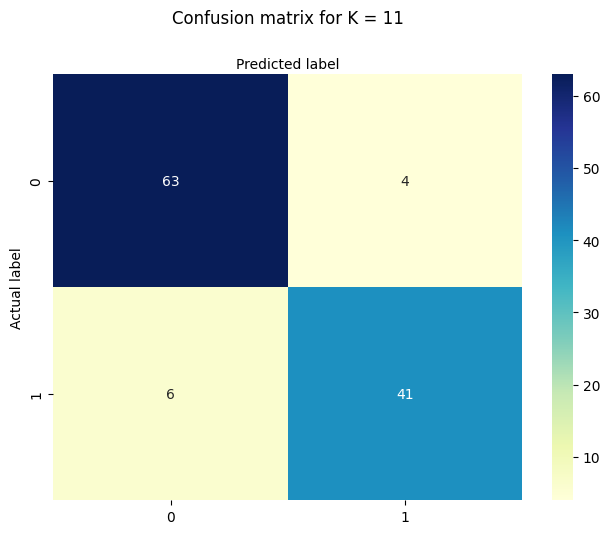

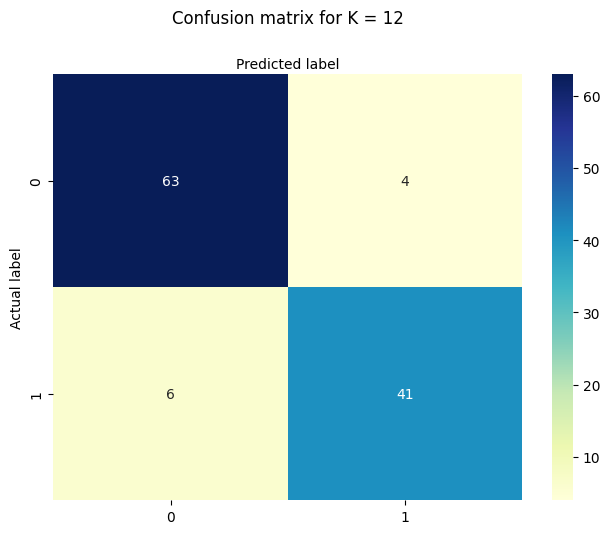

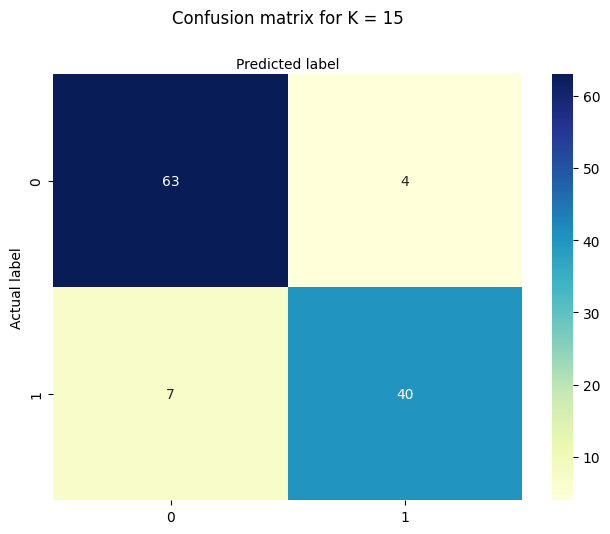

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(url))
dataset.head()

# Checking the dataset for missing data
def binary_map(x):
  return x.map({'M': 1, 'B': 0})


varlist = ['diagnosis']

dataset[varlist] = dataset[varlist].apply(binary_map)

dataset.isnull().sum()
dataset.isna().sum()

# Separating inputs from outputs
inputs = dataset.iloc[:, 2:32].values
outputs = dataset.iloc[:,1].values

# Input standardization
sc_inputs = StandardScaler()
inputs = sc_inputs.fit_transform(inputs)

# PCA feature extration
K = [1, 2, 5, 10, 11, 12, 15]
for N in K:
  pca = PCA(n_components=N)
  principalDf = pd.DataFrame(pca.fit_transform(inputs))


  newInputs = principalDf.values

  inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(newInputs, outputs, test_size=0.2, random_state=0)

  classifier = GaussianNB() # Weight Penalty
  classifier.fit(inputs_train, outputs_train)


  # Classifying data
  Output_pred = classifier.predict(inputs_test)

  cnf_matrix = confusion_matrix(outputs_test, Output_pred)

  accuracy = metrics.accuracy_score(outputs_test, Output_pred)
  precision = metrics.precision_score(outputs_test, Output_pred)
  recall = metrics.recall_score(outputs_test, Output_pred)

  # Confusion matrix heatmap

  class_names = [0, 1]
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title(f"Confusion matrix for K = %d" % N , y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  report = classification_report(outputs_test, Output_pred)
  print(report)
